# ĐỒ ÁN CUỐI KỲ LẬP TRÌNH CHO KHOA HỌC DỮ LIỆU

## Thông tin đồ án

+ Chủ đề: **Tìm hiểu về giá thuê chung cư ở thành phố Hồ Chí Minh**
+ Github: [p4ds-final](https://github.com/vanhung4499/p4ds)

### Thông tin nhóm

Nhóm bao gồm các thanh vien:

| MSSV    | Họ và tên       |
|---------|-----------------|
| 1712222 | Nguyễn Văn Hùng |

## Môi trường làm việc

In [1]:
import sys
sys.executable

'/usr/local/Caskroom/miniconda/base/envs/min_ds-env/bin/python'

Môi trường làm việc mà em dùng:
+ OS: macOS
+ IDE: Pycharm
+ Sử dụng mội trường `min_ds-evn` như các bài lab

## Import and constant

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
DATA_CSV = './data/hcm-apartment-rent-data.csv'
plt.style.use("fivethirtyeight")

## 1. Thu thập dữ liệu

### 1.1. Chủ đề, mục đích và nguồn của dữ liệu?

+ Chủ đề em nhắm tới là về giá thuê chung cư ở thành phố Hồ Chí Minh
+ Do tìm trên kaggle chỉ có duy nhất một bộ dữ liệu về giá thuê chung cư của thành phố Hồ Chí Minh nhưng đã cũ và em cảm thấy nó ít không đủ các cột nên em đã tự crawl dữ liệu từ [nhatot.vn](https://www.nhatot.com/thue-can-ho-chung-cu-tp-ho-chi-minh), trang môi giới xếp tốp đầu trong lĩnh vực bất động sản trên [Google](https://www.google.com/search?q=thu%C3%AA+chung+c%C6%B0+h%E1%BB%93+ch%C3%AD+minh&oq=thu%C3%AA+chung+c%C6%B0&aqs=chrome.1.69i59l3j0i512l2j69i60l3.4604j0j7&sourceid=chrome&ie=UTF-8)
+ Mục đích của em khá đơn giản là để xem xét giá cả chung cư cho thuê ở TPHCM, vì trong thời gian tới em cũng sẽ tìm chỗ ở mới (làm trước sau dùng lại)

### 1.2. Người ta có cho phép sử dụng dữ liệu như thế này hay không?

+ Việc crawl dữ liệu từ nhatot thông qua public api của chotot, nên có thể xem là là được phép sử dụng dữ liệu!
+ Đối với project này nhằm mục đích nâng cao kiến thức, không phục vụ múc đích thương mại

### 1.3. Thu thập dữ liệu này như thế nào?

+ Dữ liệu được em crawl từ [nhatot.vn](https://www.nhatot.com/thue-can-ho-chung-cu-tp-ho-chi-minh), là trang môi giới về bất động sản lớn ở Việt Nam, web có rất nhiều tin cho thuê nhà
+ Em crawl dữ liệu toàn bộ 1000 trang thu về 20000 record
+ Chi tiết về cách crawl được mô tả ở file notebook `Crawl-data.ipynb`

## 2. Khám phá dữ liệu

### 2.1. Đọc dữ liệu

In [4]:
apartment_df = pd.read_csv(DATA_CSV)
apartment_df.head()

,ad_id,list_id,list_time,subject,body,price,price_string,size,rooms,toilets,...,region_name,ward_name,street_name,deposit,zero_deposit,longitude,latitude,owner,company_ad,apartment_type
0,148983771,109051906,1702006245000,"1 PHÒNG NGỦ TÁCH BẾP 45M2, CHO NUÔI PET!",CĂN HỘ CAO CẤP 1 PHÒNG NGỦ!__45M2\n✓BAN CÔNG L...,8600000,"8,6 triệu/tháng",45.0,1,1.0,...,Tp Hồ Chí Minh,Phường Thảo Điền (Quận 2 cũ),Nguyễn Văn Hưởng,8600000,False,106.72764,10.815886,False,True,"Căn hộ dịch vụ, mini"
1,152808559,112328722,1701933976000,Căn hộ chung cư saigonLAND hẻm 69 Nguyễn Gia T...,Cần cho thuê căn chung cư Saigon Land tại hẻm ...,15000000,15 triệu/tháng,110.0,3,2.0,...,Tp Hồ Chí Minh,Phường 25,D2,0,False,106.71600,10.805900,False,False,Chung cư
2,152043174,111673373,1702110778000,LAVITA CHARM CHO THUÊ CH 2PN 68M2 CÓ NT ĐẸP,CH LAVITA CHARM 1PN VIEW ĐẸP NGAY GẦN NGÃ TƯ B...,8500000,"8,5 triệu/tháng",68.0,2,2.0,...,Tp Hồ Chí Minh,Phường Trường Thọ (Quận Thủ Đức cũ),Số 1,0,False,106.75830,10.826700,False,True,Chung cư
3,150969082,110755872,1701743146000,CH cửa kính Thoáng Mát - Máy giặt riêng Ngay Đ...,CH cửa kính Thoáng Mát - Máy giặt riêng Ngay Đ...,7000000,7 triệu/tháng,35.0,1,1.0,...,Tp Hồ Chí Minh,Phường 4,Đường Trần Phú,0,False,106.67910,10.762500,False,True,Chung cư
4,150055631,109969444,1702115497000,Chính chủ Cho thuê căn hộ Saigon South căn 2PN...,"- Căn hộ 71m², 75m², 76m² - 2PN + 2WC.\n+ Nội ...",13000000,13 triệu/tháng,75.0,2,2.0,...,Tp Hồ Chí Minh,Xã Phước Kiển,Nguyễn Hữu Thọ,0,False,106.71276,10.703870,False,True,Chung cư


### 2.2. Dữ liệu có bao nhiêu dòng và bao nhiêu cột?

In [5]:
apartment_df.shape

(19895, 21)

Dữ liệu gồm 19996 dòng và 20 cột, đúng như những gì đã thu thập trước đó

### 2.3. Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

+ Mỗi dòng là thông tin cho thuê của một căn hộ như giá thuê, diện tích, số phòng, số nhà vệ sinh, địa chỉ, ...
+ Dựa theo thông tin trên web lúc crawl thì sẽ không có các dòng có ý nghĩa khác nhau

### 2.4. Mỗi cột có ý nghĩa gì?

Dưới đây là phần mô tả về các cột:

| Column         | Description                                |
|----------------|--------------------------------------------|
| ad_id          | id của tin (để phân biệt)                  |
| list_id        | id trong danh sách ads (dùng để phân biệt) |
| list_time      | Thời gian đăng tin                         |
| price          | Giá thuê (VND)                             |
| price_string   | Giá thuê (triệu / tháng) cho dễ nhìn       |
| size           | Diện tích (m2)                             |
| rooms          | Số phòng                                   |
| toilets        | Số nhà vệ sinh                             |
| body           | Mô tả                                      |
| street_name    | Đường                                      |
| ward_name      | Phường                                     |
| area_name      | Quận huyện                                 |
| region_name    | Thành phố, tỉnh                            |
| zero_deposit   | Có cần tiền cọc không?                     |
| deposit        | Tiền cọc                                   |
| longitude      | Kinh độ                                    |
| latitude       | Vĩ độ                                      |
| owner          | Có phải chủ nhà không?                     |
| company_ad     | Tin của các nhân hay công ty               |
| apartment_type | Kiểu căn hộ / chung cư                     |

### 2.4. Kiểm tra dữ liệu có bị trùng lặp không?

In [6]:
apartment_df.duplicated().sum()

0

Dữ liệu thu thập được không bị trùng lặp, dựa vào việc crawl trước đó nên có thể yên tâm

### 2.5. Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

In [7]:
apartment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19895 entries, 0 to 19894
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ad_id           19895 non-null  int64  
 1   list_id         19895 non-null  int64  
 2   list_time       19895 non-null  int64  
 3   subject         19895 non-null  object 
 4   body            19895 non-null  object 
 5   price           19895 non-null  int64  
 6   price_string    19895 non-null  object 
 7   size            19895 non-null  float64
 8   rooms           19895 non-null  int64  
 9   toilets         19894 non-null  float64
 10  area_name       19895 non-null  object 
 11  region_name     19895 non-null  object 
 12  ward_name       19887 non-null  object 
 13  street_name     19885 non-null  object 
 14  deposit         19895 non-null  int64  
 15  zero_deposit    19895 non-null  bool   
 16  longitude       19894 non-null  float64
 17  latitude        19894 non-null 

Nhận thấy một số vấn đè như sau:
+ Cột `toilets`, `price` là số nhà vệ sinh nên có kiểu dữ liệu `int64`
+ Cột `list_time` là thời gian đăng tin nên có kiểu `datetime`
+ Cột `ad_id`, `list_id`, `company_ad`, sẽ không còn cần thiết
+ Cột `size`, `price`, `toilets`, `area_name` có bị thiếu nên ta sẽ loại bỏ những dòng thiếu này

In [8]:
# convert timestamp in milisecond to datetime
apartment_df['list_time'] = pd.to_datetime(apartment_df['list_time'], unit='ms')

In [9]:
# drop missing value
apartment_df = apartment_df.dropna()
# drop not used column
apartment_df = apartment_df.drop(['ad_id', 'list_id', 'company_ad'], axis=1)
apartment_df.shape

(19878, 18)

Còn lại 19873 dòng

In [10]:
# convert float64 to int64
apartment_df['toilets'] = apartment_df['toilets'].apply(np.int64)
apartment_df['price'] = apartment_df['price'].apply(np.int64)

In [11]:
apartment_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19878 entries, 0 to 19894
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   list_time       19878 non-null  datetime64[ns]
 1   subject         19878 non-null  object        
 2   body            19878 non-null  object        
 3   price           19878 non-null  int64         
 4   price_string    19878 non-null  object        
 5   size            19878 non-null  float64       
 6   rooms           19878 non-null  int64         
 7   toilets         19878 non-null  int64         
 8   area_name       19878 non-null  object        
 9   region_name     19878 non-null  object        
 10  ward_name       19878 non-null  object        
 11  street_name     19878 non-null  object        
 12  deposit         19878 non-null  int64         
 13  zero_deposit    19878 non-null  bool          
 14  longitude       19878 non-null  float64       
 15  la

Sau khi xử lý, dữ liệu đã khá ổn

### 2.6. Với mỗi cột có kiểu dữ liệu numeric, các giá trị được phân bố như thế nào?

In [12]:
pd.set_option('display.float_format',  '{:,.0f}'.format)

numeric_cols = ['price', 'size', 'rooms', 'toilets', 'deposit']
apartment_df[numeric_cols].describe()

,price,size,rooms,toilets,deposit
count,"19,878","19,878","19,878","19,878","19,878"
mean,"20,250,362",57,2,1,"6,179,840"
std,"626,361,924",511,1,1,"147,468,902"
min,"500,000",1,1,1,0
25%,"5,500,000",35,1,1,0
50%,"7,500,000",45,1,1,0
75%,"11,000,000",70,2,2,"6,000,000"
max,"73,500,000,000","72,000",11,7,"20,000,000,000"


+ Nhận ra ngay min và max của `price`, `size`, `deposit` có vấn đề:
   + Làm gì có căn hộ nào mà thuê 500k/tháng, diện tích có 2 m2, dự đoán là tin rác
   + Làm gì có ai thuê căn hộ nào thuê mà 150000 m2, giá thuê 70 tỷ/tháng, cọc 38 tỷ, dự đoán bán là đất nền nhưng đăng nhầm qua cho thuê chung cư
+ Các cột còn lại phân bố bình thường:
      + rooms từ 1 -> 11
      + toilets từ 1 -> 7
+ Vì mục tiêu tìm hiểu giá chung cư là chính, nên ta sẽ loại bỏ đi những ngoại lệ như:
    + Giá dưới 500 nghìn đồng, ở TPHCM có phòng căn hộ 500k sao?
    + Giá trên 100 triệu đồng, ai đi thuê phòng ở hơn 100 củ
    + Diện tích dưới 10 m2, nhỏ thế sao ở được?

In [13]:
index = apartment_df[(apartment_df['price'] < 500000) | (apartment_df['price'] > 100000000) | (apartment_df['size'] < 10)].index
apartment_df.drop(index, inplace=True)

apartment_df.shape

(19835, 18)

### 2.7. Với mỗi cột có kiểu dữ liệu categorical, các giá trị được phân bố như thế nào?

#### Cột **region_name**

In [14]:
apartment_df['region_name'].value_counts()

Tp Hồ Chí Minh    19835
Name: region_name, dtype: int64

Do ta chỉ xem xét ở TP HCM nên cột này chỉ có duy nhất một giá trị, loại bỏ cột này luoon

In [15]:
apartment_df = apartment_df.drop(['region_name'], axis=1)

#### Cột **area_name**

<Axes: title={'center': 'Distribution of area_name'}>

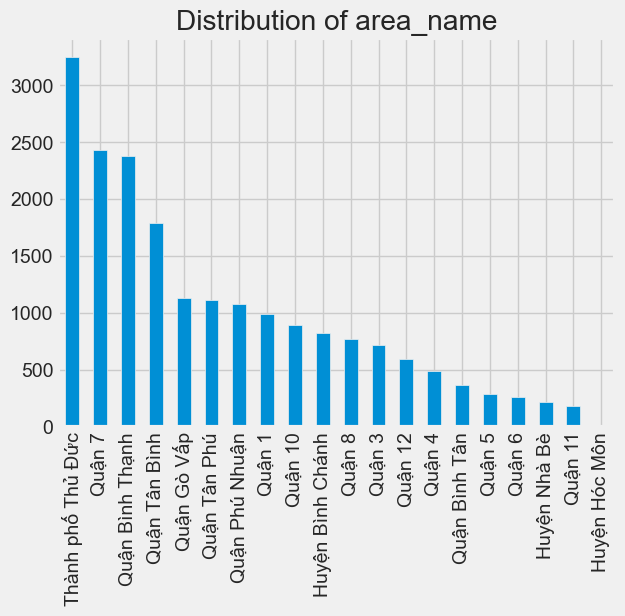

In [16]:
area = apartment_df['area_name'].value_counts()
area.plot.bar(title='Distribution of area_name')

Trên đây là phân bố căn hộ cho thuê theo quận sắp xếp theo số lượn giảm dần:
+ Nhiều nhất là quận 7 với hơn 3 nghìn tin cho thuê, tiếp theo là thành phố Đức (quận Thủ Đức + quận 9 + quận 2) diện tích rất lớn nhưng vẫn ít phòng cho thuê hơn quận 7
+ Huyện Hóc Môn xếp bét bảng với chỉ 4 tin, cũng hợp lý vì chả ai qua thuê bên đấy làm gì cả

#### Cột **owner**

In [17]:
apartment_df['owner'].value_counts()

False    19835
Name: owner, dtype: int64

Tất cả đề là False, có nghĩa là không có chủ nhà nào đăng tin cho thuê, tất cả đều là môi giới, nếu thuê thì sẽ khó thương lượng giảm giá với chủ nhà đuợc vì họ thường phải trả cho môi giới một khoản phí. Ta cũng loại bỏ cột này luôn.

In [18]:
apartment_df = apartment_df.drop(['owner'], axis=1)

#### Cột **apartment_type**

(11099, 16)


<Axes: title={'center': 'Number of apartments per type'}>

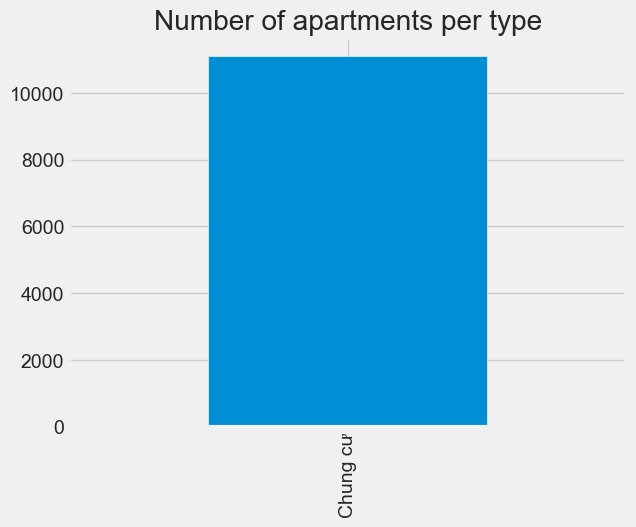

In [19]:
apartment_df = apartment_df[(apartment_df['apartment_type'] == 'Chung cư') | (apartment_df['apartment_type'] == 'Căn hộ dịch vụ')]

print(apartment_df.shape)

type = apartment_df['apartment_type'].value_counts()

type.plot.bar(title="Number of apartments per type")

+ Sau khi lọc, chỉ còn 18605 dòng
+ Đa số là căn hộ chung cư, gần gấp đôi số căn hộ dịch vụ

#### Cột **zero_deposit**

In [20]:
apartment_df['zero_deposit'].value_counts()

False    11099
Name: zero_deposit, dtype: int64

Gần như chủ nhà sẽ yêu cầu tiền cọc, chủ có 4 tin không cần cọc nhưng mà khả năng cũng là do quên điền lúc tạo tin. Ta sẽ bỏ qua cột này luôn!

In [21]:
apartment_df = apartment_df.drop(['zero_deposit'], axis=1)

#### Cột **list_time**

In [22]:
pd.to_datetime(apartment_df['list_time']).dt.date.value_counts()

2023-12-07    1442
2023-12-09    1426
2023-12-08    1419
2023-12-05    1311
2023-12-06    1204
2023-12-10    1172
2023-12-04    1010
2023-12-01     650
2023-12-02     554
2023-11-30     460
2023-12-03     451
Name: list_time, dtype: int64

Các tin được đăng từ 18/11 tới 3/12, trong khoảng 2 tuần, nên có thể coi dữ liệu là mới, tính ở thời điểm phân tích là ngày 3/12. Ta cũng có thể bỏ cột này luôn vì nó không có quá nhiều ý nghĩa khi gần nhau

In [23]:
apartment_df = apartment_df.drop(['list_time'], axis=1)

## 3. Đặt ra các câu hỏi?

### Câu 1. Giá thuê căn hộ ở các quận chênh lệch như thế nào?

**Ý nghĩa**: Có cái nhìn tổng quát về giá thuê nhà tại các quận, giá theo diện tích, theo số phòng, theo loại hình để có thể xem xét và đưa ra quyết định nên thuê ở đâu, các đặc điểm của căn hộ ra sao.

### Câu 2. Các yếu tố ảnh hưởng tới giá thuê nhà?

**Ý nghĩa**: Để hiểu thêm về sự tương quan giữa giá thuê với các yếu tố khác như diện tích, số phòng, số nhà vệ sinh, vị trí, ...

### Câu 3. Tìm một căn hộ phù hợp để thuê theo một số tiêu chí?

**Ý nghĩa**: thực tế chỉ là để tham khảo chọn phòng để thuê

## 4. Phân tích dữ liệu và trả lời từng câu hỏi

### Câu 1: Giá thuê căn hộ ở các quận chênh lệch như thế nào?

Ta sẽ tổng hợp lại dữ liệu theo các quận, rồi tìm ra min-max và avg price theo số phòng, min-max theo size

In [24]:
pd.set_option('display.float_format',  '{:,.0f}'.format)

res = apartment_df.groupby(['area_name']).agg({ 'price': ['min', 'max', 'mean', 'count'], 'size': ['min', 'max'] })
print('Mean, min, and max price grouped by area_name')
res

Mean, min, and max price grouped by area_name


price                             size       
                       min        max       mean count  min    max
area_name                                                         
Huyện Bình Chánh   1500000   19000000  7,173,067   750   25    306
Huyện Hóc Môn      4500000    5500000  5,166,667     3   53     70
Huyện Nhà Bè       3600000   25000000 11,950,000   216   13    330
Quận 1              900000  100000000 14,100,567   463   17 72,000
Quận 10            3300000   35000000 14,089,522   487   22    135
Quận 11            1675000   19000000  8,645,692    78   20    116
Quận 12            3000000   27500000  7,212,325   357   30    130
Quận 3             3000000   33000000 10,001,256   317   15    200
Quận 4              900000   45000000 16,733,148   359   26    220
Quận 5             4000000   30000000 11,852,147   163   25    132
Quận 6             3300000   20000000  9,073,326   204   25    130
Quận 7              650000   82000000 11,600,145  1700   15    257
Quận 8             2900000   27000000  8,750,613   569   10    162
Quận Bình Thạnh     900000   53500000 12,207,703   910   15    188
Quận Bình Tân      3200000   14000000  7,105,945   217   30    160
Quận Gò Vấp        2900000   18000000  8,024,953   212   18    113
Quận Phú Nhuận     4000000   32000000 11,259,725   473   20    138
Quận Tân Bình      2200000   25700000  9,473,404   658   20    240
Quận Tân Phú       1200000   30000000 10,976,348   586   12    200
Thành phố Thủ Đức   500000   85000000 13,425,690  2377   15  1,009

Ta thấy giá thuê

## 5. Tổng hợp lại quá trình thực hiện đồ án